# Predicción de admisión de un estudiante a una universidad

Utilizando el Modelo de Regresión Logística se predecirá si un alumno es admitido o rechazado en una universidad en base a su sexo y rendimiento en el Examen de Aptitud Académica para ingresar a la universidad.

Se cuenta con una base de datos que cuenta con las siguientes entradas de cada alumno:

<ul>
    <li>Puntaje Examen de Aptitud Académica (SAT)</li>
    <li>Admitido (Admitted) ------------ Variable a predecir </li>
    <li>Género (Gender)</li>    
</ul>

## Importando las librerías relevantes

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

## Cargando los datos de entrenamiento

In [13]:
datos_entrenamiento = pd.read_csv('datos estudiantes.csv')
datos = datos_entrenamiento.copy()
# Observamos la tabla original
datos

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [14]:
# En este caso asignamos valores a las categorias de 'admitido' y 'genero'
# siendo 1 cuando la persona es admitida y 0 en caso contrario
# siendo 1 cuando la persona es mujer y 0 para el caso contrario
datos['Admitted'] = datos['Admitted'].map({'Yes': 1, 'No': 0})
datos['Gender'] = datos['Gender'].map({'Female': 1, 'Male': 0})
datos

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


## Declarando las variables dependiente e independiente

In [15]:
y = datos['Admitted']
x1 = datos[['SAT','Gender']]

## Creando la regresión

In [16]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
resultados_log = reg_log.fit()

# Obtenemos el sumario de la regresión
resultados_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 May 2021   Pseudo R-squ.:                  0.8249
Time:                        15:59:09   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [17]:
# Como ejemplo, al interpretar el coeficiente del genero(gender) obtenemos que, a un mismo nivel de SAT
# una mujer tiene casi 7 veces más probabilidades de ser aceptada que un hombre.
np.exp(1.94)

6.958750970637272

## Precisión del modelo

In [18]:
# Una vez ajustado el modelo, podemos ver las predicciones en base a los datos que le proporcionamos.
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
resultados_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [19]:
# Contrastamos las predicciones con los datos reales
np.array(datos['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [20]:
# Generamos la llamada 'matriz de confusión' que nos ayuda a saber cuantas predicciones fueron correctas
# ya sea cuando un alumno fue admitido o rechazado
resultados_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [21]:
# Podemos mejorar la presentación del arreglo anterior para darle una mejor interpretación
cm_df = pd.DataFrame(resultados_log.pred_table())
cm_df.columns = ['Predecido 0','Predecido 1']
cm_df = cm_df.rename(index={0: 'Valor real 0',1:'Valor real 1'})
cm_df

,Predecido 0,Predecido 1
Valor real 0,69.0,5.0
Valor real 1,4.0,90.0


Podemos generar una matriz de confusíon aún mas atractiva al utilizar la librería de mlxtend.plotting

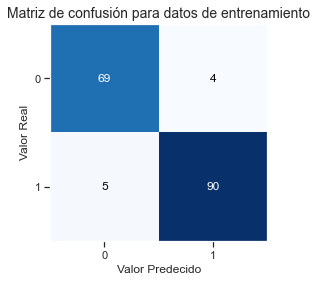

In [22]:
predicciones1 = np.round(resultados_log.predict(),0).astype(int)
mat = confusion_matrix(predicciones1,datos['Admitted'])
plot_confusion_matrix(conf_mat=mat)
plt.title('Matriz de confusión para datos de entrenamiento',size = 14)
plt.xlabel('Valor Predecido')
plt.ylabel('Valor Real')
plt.savefig('Matriz de confusión 1.png', bbox_inches = "tight")
plt.show()

In [23]:
# Por lo tanto, el modelo predice 69 veces de forma correcta que una persona fue rechazada y 5 veces predice rechazo
# cuando una persona fue realmente admitida.
# De otro modo, el modelo predice 90 veces de forma correcta que una persona fue admitida y 5 veces predice admisión
# cuando una persona fue realmente rechazada.

In [24]:
# Podemos calcular la precisión del modelo obteniendo el total de aciertos sobre el total de casos.
cm = np.array(cm_df)
precision_entrenamiento = (cm[0,0]+cm[1,1])/cm.sum()
precision_entrenamiento

0.9464285714285714

## Testeando el modelo y evaluando su precisión

In [25]:
# Cargamos datos de testeo
test = pd.read_csv('datos estudiantes test.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


In [26]:
# Asignamos nuevamente valores a las categorias de 'admitido' y 'genero'
# siendo 1 cuando la persona es admitida y 0 en caso contrario
# siendo 1 cuando la persona es mujer y 0 para el caso contrario
test['Admitted'] = test['Admitted'].map({'Yes': 1, 'No': 0})
test['Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


In [27]:
# vemos como debiesen verse los inputs para introducirlos en nuestro modelo con los datos de testeo
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [28]:
# Obtenemos los valores target de los datos de testeo
test_targets = test['Admitted']
# Preparamos los inputs de testeo para introducirlos en el modelo
test_datos = test.drop(['Admitted'],axis=1)
test_datos = sm.add_constant(test_datos)
test_datos

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [29]:
# Creamos una función que resume todos los pasos anteriores a la hora de evaluar los datos de testeo
def matriz_de_confusion(datos,datos_target,modelo):
    
        valores_predecidos = modelo.predict(datos)
        bins=np.array([0,0.5,1])
        cm = np.histogram2d(datos_target, valores_predecidos, bins=bins)[0]
        precision = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, precision

In [30]:
# Creamos una matriz de confusión con los datos anteriores
cm = matriz_de_confusion(test_datos,test_targets,resultados_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

In [31]:
# Retocamos la matriz anterior para que pueda interpretarse de mejor forma
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predecido 0','Predecido 1']
cm_df = cm_df.rename(index={0: 'Valor real 0',1:'Valor real 1'})
cm_df

,Predecido 0,Predecido 1
Valor real 0,5.0,1.0
Valor real 1,1.0,12.0


In [32]:
# Podemos obtener el porcentaje de error de clasificación
print ('Porcentaje de error de clasificación: '+str(round((1+1)/19*100,1))+'%')

Porcentaje de error de clasificación: 10.5%


#### Por lo tanto, nuestro modelo tiene una precisión del 89.5%

In [33]:
predicciones = np.round(resultados_log.predict(test_datos),0).astype(int)

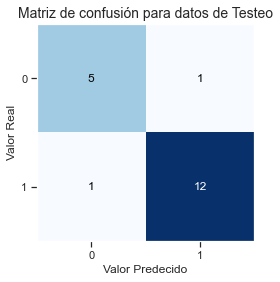

In [35]:
mat = confusion_matrix(predicciones,test_targets)
plot_confusion_matrix(conf_mat=mat)
plt.title('Matriz de confusión para datos de Testeo',size = 14)
plt.xlabel('Valor Predecido')
plt.ylabel('Valor Real')
plt.savefig('Matriz de confusión 2.png', bbox_inches = "tight")
plt.show()